# Introdução com Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Bibliotecas básicas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

### Carregando o dataset

In [3]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

### Exploração dos dados

In [4]:
print(f'Shape treino: {imagens_treino.shape}')
print(f'Shape teste: {imagens_teste.shape}')

Shape treino: (60000, 28, 28)
Shape teste: (10000, 28, 28)


### Exibição dos dados

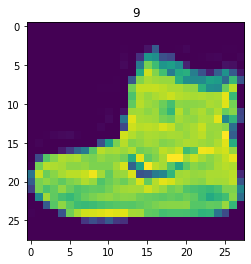

In [5]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.show()

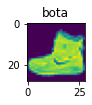

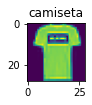

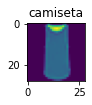

In [6]:
total_labels = 10
nome_classificacoes = ['camiseta', 'calça', 'pullover', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']


for imagem in range(3):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])
  plt.show()  

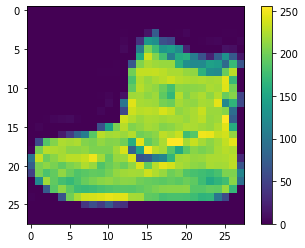

In [7]:
plt.imshow(imagens_treino[0])
plt.colorbar()
plt.show()

### Criando o modelo


     modelo sequencia
                        entrada
                        processamento
                        saída

In [8]:
imagens_treino_normalizado = imagens_treino/255.0

In [9]:
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(total_labels, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6674 - accuracy: 0.7680 - val_loss: 0.4155 - val_accuracy: 0.8443
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4154 - accuracy: 0.8480 - val_loss: 0.3789 - val_accuracy: 0.8608
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3699 - accuracy: 0.8650 - val_loss: 0.3599 - val_accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3419 - accuracy: 0.8747 - val_loss: 0.3443 - val_accuracy: 0.8764
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3241 - accuracy: 0.8800 - val_loss: 0.3355 - val_accuracy: 0.8777


### Avaliando o modelo

In [10]:
testes = modelo.predict(imagens_teste)
print(f'Predito: {np.argmax(testes[0])}')
print(f'Real: {identificacoes_teste[0]}')

Predito: 9
Real: 9


In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda: {perda_teste} | Acurácia: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 52.9721 - accuracy: 0.8542
Perda: 52.972145080566406 | Acurácia: 0.854200005531311


### Visualização das acurácias de treino e validação por época

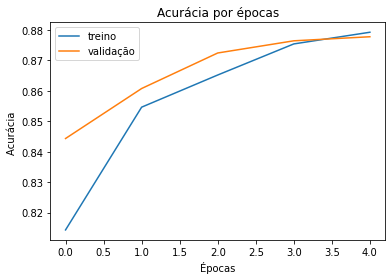

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Visualização das perdas de treino e validação por época

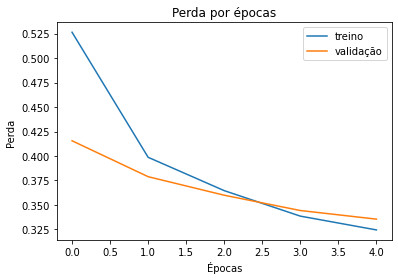

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda ')
plt.legend(['treino', 'validação'])
plt.show()

### Salvando o modelo

In [14]:
modelo.save('/content/drive/MyDrive/Colab Notebooks/Alura/modelo.h5')

### Carregando o modelo

In [15]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('/content/drive/MyDrive/Colab Notebooks/Alura/modelo.h5')

### Predição

In [16]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Predito: {np.argmax(testes_modelo_salvo[0])}')

Predito: 9


# Parte 2

### Resumo do modelo

In [17]:
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Pesos da camada 1

In [18]:
pesos_dense_1 = modelo.layers[1].get_weights()[0]
pesos_dense_1

array([[ 0.09656806,  0.04787845, -0.07071303, ..., -0.06640173,
         0.01227424, -0.01218792],
       [-0.11739184,  0.11319685,  0.01282881, ..., -0.06919638,
        -0.09645067, -0.00753323],
       [-0.08974171,  0.05480606, -0.00065931, ..., -0.11372029,
        -0.11110463, -0.0455971 ],
       ...,
       [-0.07537261, -0.04829836,  0.33175802, ..., -0.1260811 ,
         0.08373075,  0.00818327],
       [ 0.01150879,  0.162069  ,  0.36142752, ..., -0.01145112,
         0.01652305,  0.01341471],
       [-0.18569422,  0.12149421,  0.25049374, ..., -0.00345813,
         0.18710813,  0.01070926]], dtype=float32)

In [19]:
pesos_dense_1.shape

(784, 256)

### Vieses da camada 1

In [20]:
vieses_dense_1 = modelo.layers[1].get_weights()[1] #viés mede a distância da classe correta
vieses_dense_1[:10]

array([ 0.04205816, -0.20599213, -0.21231915, -0.04648375,  0.25559536,
        0.33025828, -0.09020194,  0.14240041,  0.0193093 ,  0.06874711],
      dtype=float32)

In [21]:
vieses_dense_1.shape

(256,)

### Zerando os pesos

In [22]:
pesos_dense_1_zerados = np.zeros(pesos_dense_1.shape)
print(pesos_dense_1_zerados.shape)
pesos_dense_1_zerados

(784, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
modelo.layers[1].set_weights([pesos_dense_1_zerados, vieses_dense_1])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7037 - accuracy: 0.7526 - val_loss: 0.3990 - val_accuracy: 0.8536
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4158 - accuracy: 0.8475 - val_loss: 0.3788 - val_accuracy: 0.8598
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3811 - accuracy: 0.8604 - val_loss: 0.3804 - val_accuracy: 0.8602
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3583 - accuracy: 0.8675 - val_loss: 0.3441 - val_accuracy: 0.8756
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3334 - accuracy: 0.8780 - val_loss: 0.3394 - val_accuracy: 0.8799


### Visualizando as acurácias e perdas

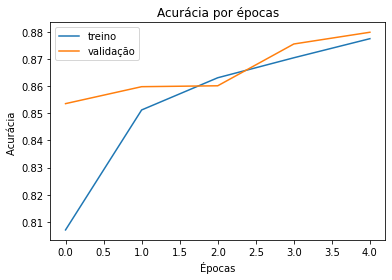

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

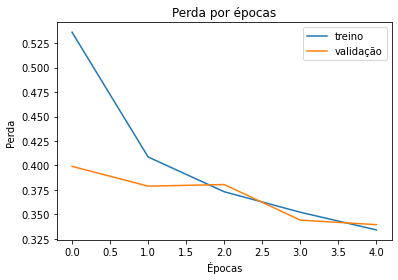

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda ')
plt.legend(['treino', 'validação'])
plt.show()

### Deixando os pesos aleatórios

In [26]:
pesos_dense_1_aleatorios = np.random.rand(784, 256)
print(pesos_dense_1_aleatorios.shape)
pesos_dense_1_aleatorios

(784, 256)


array([[0.96008582, 0.5626946 , 0.22412464, ..., 0.84226671, 0.01824525,
        0.35855058],
       [0.81695045, 0.18165705, 0.26555274, ..., 0.24108745, 0.6939176 ,
        0.12804631],
       [0.19284595, 0.36128612, 0.35282914, ..., 0.13959528, 0.61982493,
        0.25059374],
       ...,
       [0.93254793, 0.82203853, 0.6814046 , ..., 0.92014419, 0.51285355,
        0.76378318],
       [0.76541951, 0.01268795, 0.86487981, ..., 0.18380982, 0.03426778,
        0.21479204],
       [0.26472072, 0.051217  , 0.89034625, ..., 0.60624132, 0.62768231,
        0.92084276]])

In [27]:
modelo.layers[1].set_weights([pesos_dense_1_aleatorios, vieses_dense_1])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 206.8965 - accuracy: 0.2956 - val_loss: 14.4637 - val_accuracy: 0.7413
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 36.7726 - accuracy: 0.6083 - val_loss: 10.1592 - val_accuracy: 0.7694
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 16.4654 - accuracy: 0.6897 - val_loss: 5.7037 - val_accuracy: 0.7886
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 8.0003 - accuracy: 0.7275 - val_loss: 3.4314 - val_accuracy: 0.7808
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 4.2749 - accuracy: 0.7510 - val_loss: 2.1981 - val_accuracy: 0.8138


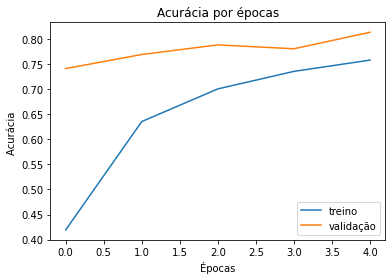

In [28]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

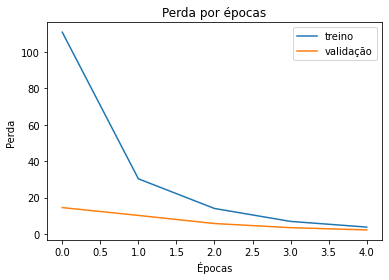

In [29]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda ')
plt.legend(['treino', 'validação'])
plt.show()

### Configuração do modelo

In [30]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None